#               Proyecto Final - Data Science - Furey Francisco, Mathias Arduh, Ricardo Paserano

  Este es un trabajo practico de estudio sacado de Kaggle (https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

  El mismo trata sobre la aprobacion de tarjetas de credito para ciertos tipos de personas, calificando cada persona por si es un buen cliente o un mal cliente. Cuenta con dos archivos CSV, en donde uno tiene las aplicaciones con info particular de cada persona que quiere pedir el credito (como donde trabaja, ganancias anuales, cantidad de personas en su familia, etc), el otro tiene la informacion de si fue considerado un buen cliente o mal cliente dependiendo de si tiene deudas, si las paga a tiempo y en forma, o si no. 

### Acerca del conjunto de datos
Un conjunto de datos de tarjetas de crédito para el aprendizaje automático.

## Contexto:

Las tarjetas de crédito son un método común de control de riesgos en la industria financiera. Utiliza la información personal y los datos enviados por los solicitantes de tarjetas de crédito para predecir la probabilidad de futuros impagos y préstamos de tarjetas de crédito. El banco puede decidir si emite una tarjeta de crédito al solicitante. Las puntuaciones de crédito pueden cuantificar objetivamente la magnitud del riesgo.

## Tarea
Construir un modelo de aprendizaje automático para predecir si un solicitante es un cliente "bueno" o "malo", a diferencia de otras tareas, no se da la definición de "bueno" o "malo". Deberá utilizar alguna técnica, como el análisis vintage, para construir su etiqueta. Además, el problema del desequilibrio de datos es un gran problema en esta tarea.

Contenido y explicación
Hay dos tablas que se pueden fusionar por ID:

### application_record.csv		
ID: Número de cliente	

CODE_GENDER: Género	

FLAG_OWN_CAR: ¿Hay un coche?	

FLAG_OWN_REALTY: Hay una propiedad	

CNT_CHILDREN: Número de hijos	

AMT_INCOME_TOTAL: Ingresos anuales	

NAME_INCOME_TYPE: Categoría de ingresos	

NAME_EDUCATION_TYPE: Nivel de estudios	

NAME_FAMILY_STATUS: Estado civil	

NAME_HOUSING_TYPE: Modo de vida	

DAYS_BIRTH: Cumpleaños Cuenta hacia atrás desde el día actual (0), -1 significa ayer

DAYS_EMPLOYED: Fecha de inicio del empleo Cuenta hacia atrás desde el día actual (0). Si es positivo, significa que la persona está actualmente desempleada.

FLAG_MOBIL: ¿Hay un teléfono móvil?	

FLAG_WORK_PHONE: ¿Hay un teléfono de trabajo?	

FLAG_PHONE: Hay un teléfono	

FLAG_EMAIL: Hay un correo electrónico	

OCCUPATION_TYPE: Ocupación	

CNT_FAM_MEMBERS: Tamaño de la familia	

### credit_record.csv		

ID: Número de cliente	

MONTHS_BALANCE: Mes de registro. El mes de los datos extraídos es el punto de partida, hacia atrás, 0 es el mes actual, -1 es el mes anterior, y así sucesivamente

STATUS: Estado 0: 1-29 días de atraso 1: 30-59 días de atraso 2: 60-89 días de atraso 3: 90-119 días de atraso 4: 120-149 días de atraso 5: atrasos o deudas incobrables, cancelaciones por más de 150 días C: cancelado ese mes X: no hay préstamo en el mes.

### Paso 1: Importamos Librerias.

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno
import math
import scipy as sp
import numpy as np
from scipy.stats import uniform
from sklearn import preprocessing, svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
%config InlineBackend.figure_format = 'svg'
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

### 2: Traemos los archivos, los leemos, damos nombre.

In [2]:
application=pd.read_csv('application_record.csv')
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
credit=pd.read_csv('credit_record.csv')
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


### 3: Analizamos sus variables (columnas), con medidas de tendencia centrales

In [4]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
application.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [7]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


Analizando los datos obtenidos hasta ahora, vemos que la variable FLAG_MOBIL (que corresponde a si tiene telefono movil) son todas 1 (osea que si tiene).  
 Aqui mi teoria: los datos estan mal con respecto a esto, porque comparandola con las otras variables de si tienen telefono fijo, telefono del trabajo y email, en todas existen mas personas que no lo tienen, de que si lo tienen. 
 
 Por otro lado, la variable de cantidad de miembros de familia y de cantidad de hijos tienen mucha correlacion.
 
 Por ende, mi solucion seria sacar esta variable del dataset a analizar (FLAG_MOBIL), y tambien la de cantidad de hijos (CNT_CHILDREN).

In [8]:
application=application.drop(columns=['FLAG_MOBIL','CNT_CHILDREN'])

Procedemos a renombrar las columnas para un mejor entendimiento del trabajo practico

In [9]:
application.columns=['ID','Sexo','Tiene_Auto',
                     'Tiene_Casa','Ingresos_Anuales','Tipo_Ingreso',
                     'Educacion','Estado_Civil','Tipo_Vivienda','Dias_Cumpleaños',
                     'Dias_Trabajando','Telefono_Trabajo','Telefono','Email','Ocupacion','Cant_Familia']


4: Analizamos si tiene valores faltantes (aunque ya sabemos esta informacion, por el uso de la funcion 'info()', es necesario saber si los NaN estan acumulados en una parte del dataset, o si estan distribuidos sobre todo el largo del mismo)

In [12]:
msno.matrix(application);

## Data Merge
### Procedemos a unir los datasets. 


###### Parte de este codigo fue copiado de otros, ya que no lograba crear la variable predictora.

In [13]:
application=application.sort_values('ID')
credit=credit.sort_values('ID')
credit['STATUS_BINARY']=credit.STATUS
credit=credit.replace({'STATUS_BINARY':{'C':'Good','X':'Good','0':'Bad','1':'Bad','2':'Bad','3':'Bad','4':'Bad','5':'Bad'}})
result_df=credit.value_counts(subset=['ID','STATUS_BINARY']).unstack(fill_value=0).reset_index()
result_df.loc[(result_df['Good']/result_df['Bad']>=1),'Status']=1
result_df.loc[(result_df['Good']/result_df['Bad']<1),'Status']=0
result_df['Status']=result_df['Status'].astype(int)
df=application.merge(result_df,how='inner',on=['ID'])
df['rate']=(df['Good']+0.1)/(df['Bad']+0.1)
df



,ID,Sexo,Tiene_Auto,Tiene_Casa,Ingresos_Anuales,Tipo_Ingreso,Educacion,Estado_Civil,Tipo_Vivienda,Dias_Cumpleaños,Dias_Trabajando,Telefono_Trabajo,Telefono,Email,Ocupacion,Cant_Familia,Bad,Good,Status,rate
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,2,14,1,6.714286
1,5008805,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,2,13,1,6.238095
2,5008806,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,7,23,1,3.253521
3,5008808,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,2,3,1,1.476190
4,5008809,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,5,1,51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,F,Y,Y,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,12,6,0,0.504132
36453,5150483,F,Y,Y,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,0,18,1,181.000000
36454,5150484,F,Y,Y,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,12,1,0,0.090909
36455,5150485,F,Y,Y,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,2,0,0,0.047619


In [14]:
df.drop(['Good','Bad'],axis=1,inplace=True);
df['Dias_Cumpleaños'] = abs(df['Dias_Cumpleaños'])/(365)
df['Dias_Trabajando'] = abs(df['Dias_Trabajando'])/(365)
df=df.rename(columns={'Dias_Cumpleaños':'Edad','Dias_Trabajando':'Años_Experiencia'})
df.head(2)

,ID,Sexo,Tiene_Auto,Tiene_Casa,Ingresos_Anuales,Tipo_Ingreso,Educacion,Estado_Civil,Tipo_Vivienda,Edad,Años_Experiencia,Telefono_Trabajo,Telefono,Email,Ocupacion,Cant_Familia,Status,rate
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,0,0,NaN,2.0,1,6.714286
1,5008805,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,0,0,NaN,2.0,1,6.238095


### 5: Usamos la libreria pandas_profiling para que nos traiga un analisis completo de nuestros dataset, y poder tener una mirada de un tercero sobre nuestros datos.

In [ ]:
#pandas_profiling.ProfileReport(df)

# 6: EDA

### Historial de buenos y malos clientes:

In [15]:
df.Status.value_counts()

1    20203
0    16254
Name: Status, dtype: int64

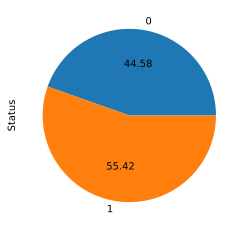

In [16]:
df.groupby('Status')['Status'].count().plot(kind='pie',y='Status',autopct='%.2f');

### Graficacion de generos del dataset:

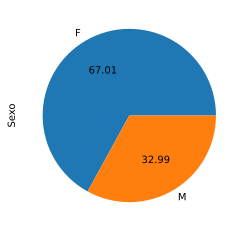

In [17]:
df.groupby('Sexo')['Sexo'].count().plot(kind='pie',y='Sexo',autopct='%.2f');

# Vemos algunas caracteristicas del dataset y las comparamos con el ratio.

### En el siguiente grafico observamos ratio de cada lectura dividido por el Tipo de Ingreso. Parece ser que los estudiantes tiene un mal ratio:

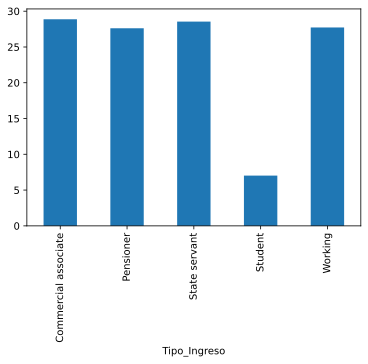

In [18]:
df.groupby('Tipo_Ingreso')['rate'].mean().plot(kind='bar');

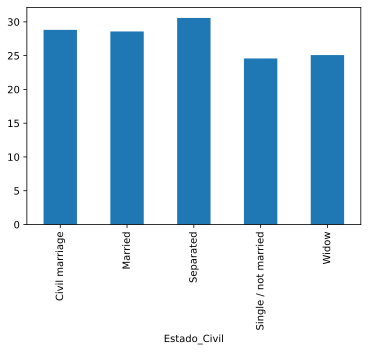

In [19]:
df.groupby('Estado_Civil')['rate'].mean().plot(kind='bar');

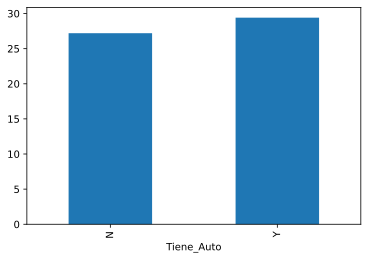

In [20]:
df.groupby('Tiene_Auto')['rate'].mean().plot(kind='bar');

### En la siguiente observacion podemos ver que familias de 6 y 7 miembros tienen buen ratio.

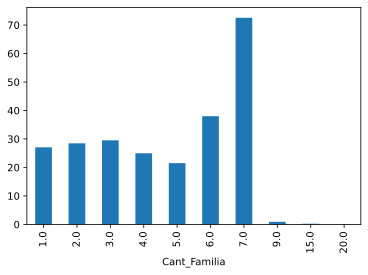

In [21]:
df.groupby('Cant_Familia')['rate'].mean().plot(kind='bar');

## La mayoria de las personas del dataset tienen una casa o apartamento propio:

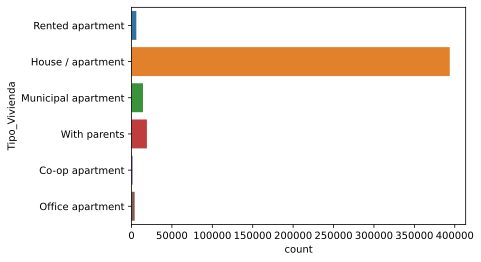

In [22]:
sns.countplot(y=application.Tipo_Vivienda);

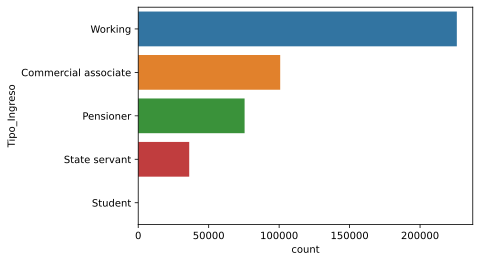

In [23]:
sns.countplot(y=application.Tipo_Ingreso,);

## La mayoria de las personas del df cuentan con el secundario terminado, y un tercio del df tienen un titulo academico. 

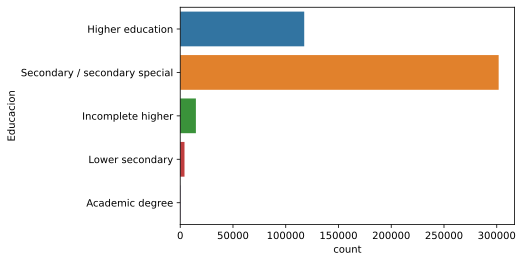

In [24]:
sns.countplot(y=application.Educacion);

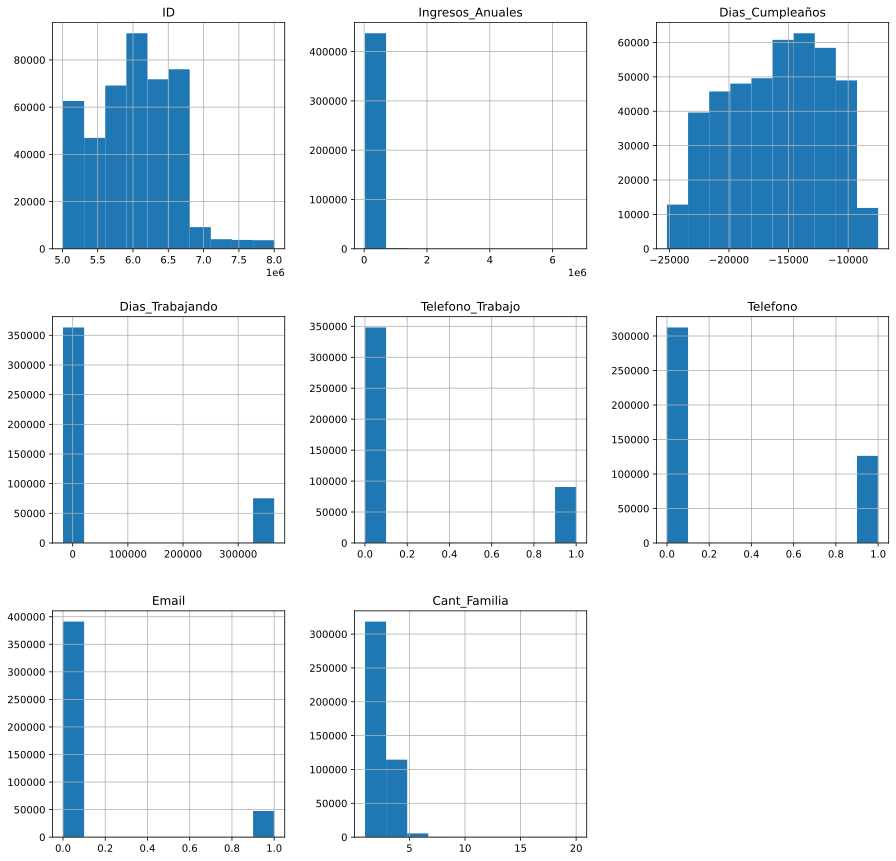

In [25]:
application.hist(figsize=(15,15));
plt.show()

# Get Dummys

### Modificamos algunas de las varibles categoricas a numericas. 

In [26]:
df=pd.get_dummies(df,drop_first=True)
df

,ID,Ingresos_Anuales,Edad,Años_Experiencia,Telefono_Trabajo,Telefono,Email,Cant_Familia,Status,rate,...,Ocupacion_Laborers,Ocupacion_Low-skill Laborers,Ocupacion_Managers,Ocupacion_Medicine staff,Ocupacion_Private service staff,Ocupacion_Realty agents,Ocupacion_Sales staff,Ocupacion_Secretaries,Ocupacion_Security staff,Ocupacion_Waiters/barmen staff
0,5008804,427500.0,32.890411,12.443836,1,0,0,2.0,1,6.714286,...,0,0,0,0,0,0,0,0,0,0
1,5008805,427500.0,32.890411,12.443836,1,0,0,2.0,1,6.238095,...,0,0,0,0,0,0,0,0,0,0
2,5008806,112500.0,58.832877,3.106849,0,0,0,2.0,1,3.253521,...,0,0,0,0,0,0,0,0,1,0
3,5008808,270000.0,52.356164,8.358904,0,1,1,1.0,1,1.476190,...,0,0,0,0,0,0,1,0,0,0
4,5008809,270000.0,52.356164,8.358904,0,1,1,1.0,1,51.000000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,157500.0,29.610959,4.764384,0,0,0,3.0,0,0.504132,...,0,0,0,0,0,0,0,0,0,0
36453,5150483,157500.0,29.610959,4.764384,0,0,0,3.0,1,181.000000,...,0,0,0,0,0,0,0,0,0,0
36454,5150484,157500.0,29.610959,4.764384,0,0,0,3.0,0,0.090909,...,0,0,0,0,0,0,0,0,0,0
36455,5150485,157500.0,29.610959,4.764384,0,0,0,3.0,0,0.047619,...,0,0,0,0,0,0,0,0,0,0


# Under-Sampling

1    20203
0    16254
Name: Status, dtype: int64


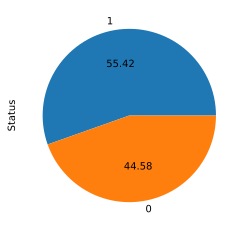

In [27]:
X=df.drop('Status',axis=1)
y=df.Status
print(y.value_counts())
y.value_counts().plot.pie(autopct='%.2f');

In [28]:
rus=RandomUnderSampler(sampling_strategy=1)
X,y=rus.fit_resample(X,y)

0    16254
1    16254
Name: Status, dtype: int64


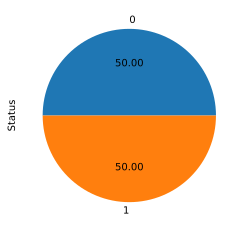

In [29]:
print(y.value_counts())
y.value_counts().plot.pie(autopct='%.2f');

# Train Test Split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Se decidio realizar un undersampling por encima de un oversampling, porque estamos teniendo problemas de overfitting. 

## Fiteado y Transformado. 

In [31]:
power= PowerTransformer(method='yeo-johnson')
X_train=power.fit_transform(X_train)
X_test=power.fit_transform(X_test)

# Escalado 

In [32]:
normalizer= preprocessing.StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test=normalizer.fit_transform(X_test)

# Machine Learning Models. 

# RandomForestClassifier

In [33]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
rfc= RandomForestClassifier(random_state=0)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
print('Mejores parametros:',gridF.best_params_)
print('Mejor Score:',gridF.best_score_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Mejores parametros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor Score: 1.0


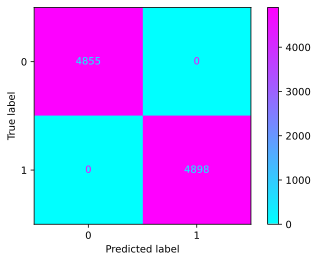

 
        || Reporte de Clasificacion RandomForestClassifier ||
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4855
           1       1.00      1.00      1.00      4898

    accuracy                           1.00      9753
   macro avg       1.00      1.00      1.00      9753
weighted avg       1.00      1.00      1.00      9753



In [34]:
rfc= RandomForestClassifier(random_state=0,max_depth=5,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
plot_confusion_matrix(rfc,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion RandomForestClassifier ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# SVMClassifier

In [36]:
svc=SVC(probability=True,random_state=1)
rand_list={'C':uniform(2,10),
          'gamma':uniform(0.1,1)}
rand_search=RandomizedSearchCV(svc,param_distributions=rand_list,n_iter=20,n_jobs=4,cv=3,scoring=auc,random_state=20)
rand_search.fit(X_train,y_train)
print('Mejores parametros:',rand_search.best_params_)

Mejores parametros: {'C': 7.8813080107727425, 'gamma': 0.9977137279094179}


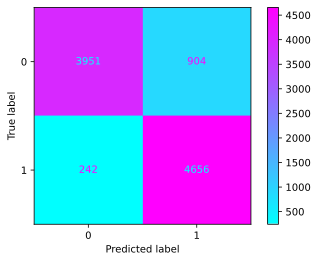

 
        || Reporte de Clasificacion SVMClassifier ||
 
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4855
           1       0.84      0.95      0.89      4898

    accuracy                           0.88      9753
   macro avg       0.89      0.88      0.88      9753
weighted avg       0.89      0.88      0.88      9753



In [37]:
svm=SVC(C=7.88,gamma=0.99)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
plot_confusion_matrix(svm,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion SVMClassifier ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# MLPClassifier

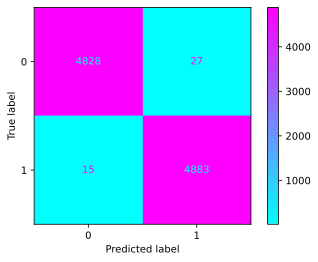

 
        || Reporte de Clasificacion MLPClassifier ||
 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4855
           1       0.99      1.00      1.00      4898

    accuracy                           1.00      9753
   macro avg       1.00      1.00      1.00      9753
weighted avg       1.00      1.00      1.00      9753



In [38]:
mlp= MLPClassifier(verbose=0,max_iter=46,random_state=0)
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
plot_confusion_matrix(mlp,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion MLPClassifier ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# LightGBM

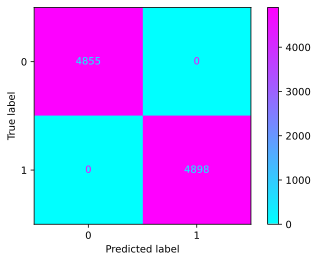

 
        || Reporte de Clasificacion LightGBM ||
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4855
           1       1.00      1.00      1.00      4898

    accuracy                           1.00      9753
   macro avg       1.00      1.00      1.00      9753
weighted avg       1.00      1.00      1.00      9753



In [39]:
gbm=lgb.LGBMClassifier()
gbm.fit(X_train,y_train)
y_pred=gbm.predict(X_test)
plot_confusion_matrix(gbm,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion LightGBM ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# Adaboost

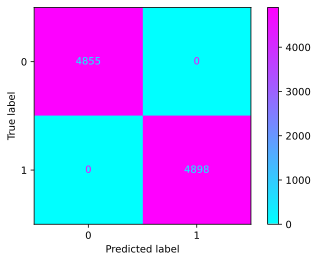

 
        || Reporte de Clasificacion Adaboost ||
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4855
           1       1.00      1.00      1.00      4898

    accuracy                           1.00      9753
   macro avg       1.00      1.00      1.00      9753
weighted avg       1.00      1.00      1.00      9753



In [40]:
ada=AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada=ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
plot_confusion_matrix(ada,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion Adaboost ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# Algoritmo Elegido
# KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier()
param_dist={'n_neighbors':sp.stats.randint(1,10),
           'weights':['uniform','distance'],
           'leaf_size':sp.stats.randint(1,10),
           'algorithm':['auto','kd_tree']}
model=RandomizedSearchCV(knn,param_dist,n_iter=10,cv=5,return_train_score=True)
model.fit(X_train,y_train)
print('Mejores parametros:',model.best_params_)
print('Mejor Score:',model.best_score_)

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 9, 'weights': 'distance'}
Mejor Score: 0.892946605141727


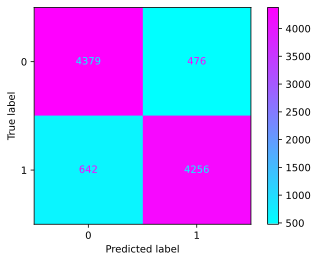

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4855
           1       0.90      0.87      0.88      4898

    accuracy                           0.89      9753
   macro avg       0.89      0.89      0.89      9753
weighted avg       0.89      0.89      0.89      9753



In [43]:
neigh=KNeighborsClassifier(n_neighbors=9,algorithm='kd_tree',leaf_size=5,weights='distance')
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)
plot_confusion_matrix(neigh,X_test,y_test,cmap='cool')
plt.show()
print(metrics.classification_report(y_test,y_pred))